In [1]:
import src
from scipy.io import loadmat, whosmat
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd
import plotly.express as px
from src import config
from src import *
import re
from src import loadmatNina 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
import numpy as np
from itertools import combinations
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
import numpy as np
from itertools import combinations
from scipy.io import whosmat
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt




In [2]:
# Choose the database to analyze
database = 'DB4'

data_path = f'data/{database}'

# Find the folder named with the convention s + "number"
folder = None
for item in os.listdir(data_path):
    if re.match(r'[sS]\d+', item) or re.match(r'Subject\d+', item):
        folder = item
        break

if folder:
    folder_path = os.path.join(data_path, folder)
    results = []

    # Iterate over all .mat files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.mat'):
            file_path = os.path.join(folder_path, file_name)
            info = whosmat(file_path)
            results.append((file_name, info))

    # Create a DataFrame to store the results
    data = {}
    for file_name, info in results:
        for item in info:
            if item[0] not in data:
                data[item[0]] = {}
            data[item[0]][file_name] = item[1:]

    df = pd.DataFrame(data)
    df = df.transpose()
    df.columns.name = 'File Name'

    print(df)
else:
    print("No folder found with the convention s + 'number'")

File Name                 S1_E1_A1.mat             S1_E2_A1.mat  \
emg            ((1239383, 12), single)  ((1760957, 12), single)   
stimulus          ((1239383, 1), int8)     ((1760957, 1), int8)   
subject               ((1, 1), double)         ((1, 1), double)   
repetition        ((1239383, 1), int8)     ((1760957, 1), int8)   
age                   ((1, 1), double)         ((1, 1), double)   
exercise              ((1, 1), double)         ((1, 1), double)   
circumference         ((1, 1), double)         ((1, 1), double)   
frequency             ((1, 1), double)         ((1, 1), double)   
gender                    ((1,), char)             ((1,), char)   
height                ((1, 1), double)         ((1, 1), double)   
weight                ((1, 1), double)         ((1, 1), double)   
laterality                ((1,), char)             ((1,), char)   
sensor                    ((1,), char)             ((1,), char)   
restimulus      ((1239383, 1), double)   ((1760957, 1), double

In [3]:
# Database name 
database = 'DB4'

# Full path to the database folder
data_path = os.path.abspath(os.path.join('data', database))

# List of subjects, generating names from 's1' to 's10'
subjects = [f's{i}' for i in range(1, 11)]


Loaded file: S1_E1_A1.mat
Total test time: 619.6915 seconds
Total test time: 10.328191666666667 minutes
Unique restimulus values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Total EMG samples: 14872596.0
Frequency: 2000 Hz
Summary for the whole file:
        __globals__           emg      stimulus  subject    repetition   age  \
25%             NaN -8.996921e+01  0.000000e+00      1.0  0.000000e+00  29.0   
50%             NaN -4.555057e+00  3.000000e+00      1.0  2.000000e+00  29.0   
75%             NaN  7.687926e+01  8.000000e+00      1.0  4.000000e+00  29.0   
count           0.0  1.487260e+07  1.239383e+06      1.0  1.239383e+06   1.0   
freq            NaN           NaN           NaN      NaN           NaN   NaN   
max             NaN  3.011400e+04  1.200000e+01      1.0  6.000000e+00  29.0   
mean            NaN -5.482289e+00  4.090893e+00      1.0  2.203224e+00  29.0   
min             NaN -2.516700e+04  0.000000e+00      1.0  0.000000e+00  29.0   
std             NaN  7.292349e+0

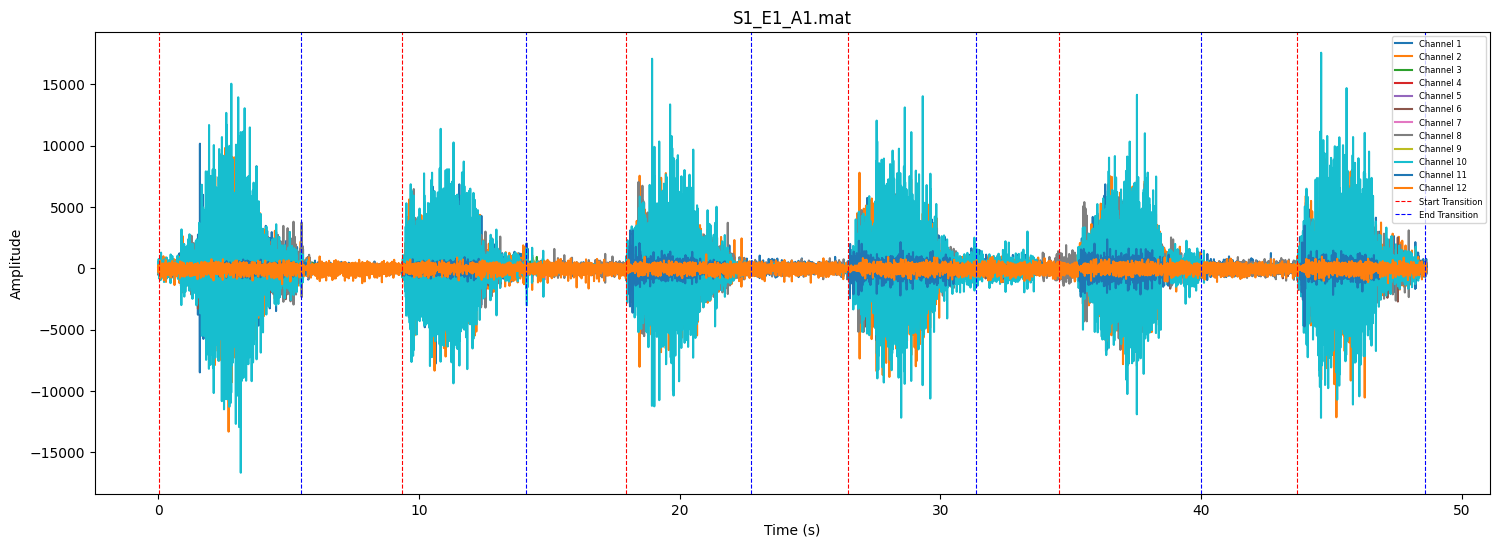

Loaded file: S1_E2_A1.mat
Total test time: 880.4785 seconds
Total test time: 14.674641666666668 minutes
Unique restimulus values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Total EMG samples: 21131484.0
Frequency: 2000 Hz
Summary for the whole file:
        __globals__           emg      stimulus  subject    repetition   age  \
25%             NaN -8.209941e+01  0.000000e+00      1.0  0.000000e+00  29.0   
50%             NaN -4.404251e+00  4.000000e+00      1.0  2.000000e+00  29.0   
75%             NaN  7.037823e+01  1.100000e+01      1.0  4.000000e+00  29.0   
count           0.0  2.113148e+07  1.760957e+06      1.0  1.760957e+06   1.0   
freq            NaN           NaN           NaN      NaN           NaN   NaN   
max             NaN  2.426700e+04  1.700000e+01      1.0  6.000000e+00  29.0   
mean            NaN -5.337770e+00  5.654732e+00      1.0  2.200919e+00  29.0   
min             NaN -2.329500e+04  0.000000e+00      1.0  0.000000e+00  29.0   
std             N

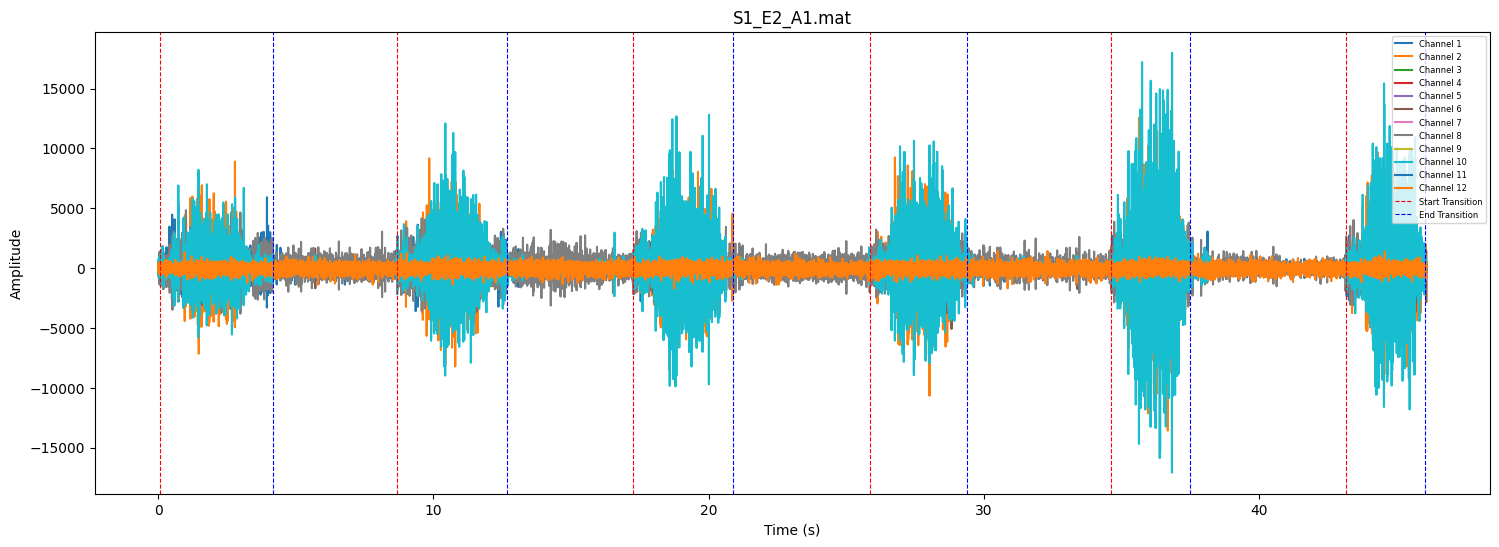

In [ ]:
# Iterate over each subject
for subject in subjects:
    subject_path = os.path.join(data_path, subject)  # Ruta de la carpeta s1, s2, etc.

    # List of specific file names for each subject
    filenames = [f"{subject.upper()}_E1_A1.mat",
                 f"{subject.upper()}_E2_A1.mat",
                 f"{subject.upper()}_E3_A1.mat"]

    # recorrer cada archivo
    for filename in filenames:
        file_path = os.path.join(subject_path, filename)
        mat_file = src.loadmatNina(database, filename, subject=subject)
        
        # Verificar si el archivo existe
        if os.path.isfile(file_path):
            print(f"Loading file: {file_path}")
            grasp = 2
            src.plot_emg_data(database, mat_file, grasp, interactive=False, include_rest=True, use_stimulus=False, addFourier = False, padding = 100, title = filename)
        else:
            print(f"File not found: {file_path}")

In [ ]:
# Create a DataFrame to store the results
columns = ["Subject", "Filename", "Restimulus Shape", "Movements", "Test Time (s)"]
results = []

for subject in subjects:
    subject_path = os.path.join(data_path, subject)

    # List of specific files for each subject
    filenames = [f"{subject.upper()}_E1_A1.mat",
                 f"{subject.upper()}_E2_A1.mat",
                 f"{subject.upper()}_E3_A1.mat"]

    # Iterate over each file
    for filename in filenames:
        file_path = os.path.join(subject_path, filename)

        # Check if the file exists
        if os.path.isfile(file_path):
            print(f"Loading file: {file_path}")

            # Load the .mat file data
            data = loadmat(file_path)  
            restimulus = data['restimulus'].flatten() # Extract and flatten the restimulus vector

            # Output parameters
            repetitions = len(set(restimulus))  # Calculate the number of unique movements
            test_time = len(restimulus) / 2000  ## Calculate the total time (assuming 2kHz frequency)
            
            # Store the results in the list
            results.append([subject, filename, restimulus.shape, repetitions, test_time])
            
            # Plot the EMG channels
            grasp = 2
            src.plot_emg_data(database="DB4", mat_file=data, grasp_number=grasp, interactive=False, include_rest=True, use_stimulus=False, addFourier=False, padding=100, title = filename)
        else:
            print(f"File not found: {file_path}")

In [ ]:
# Iterate over each subject
for subject in subjects:
    subject_path = os.path.join(data_path, subject)

    # List of .mat files for each subject
    filenames = [f"{subject.upper()}_E1_A1.mat",
                f"{subject.upper()}_E2_A1.mat",
                f"{subject.upper()}_E3_A1.mat"]

    # Iterate over each file
    for filename in filenames:
        file_path = os.path.join(subject_path, filename) # Build the full file path

        if os.path.isfile(file_path): # Check if the file exists
            # Load data from the .mat file
            print(f"Loading file: {file_path}")
            data = loadmat(file_path)  
            restimulus = data['restimulus'].flatten()  # Extract and flatten the restimulus vector

            # Output parameters
            repetitions = len(set(restimulus)) # Number of movements (excluding rest, subtract 1)

            test_time = len(restimulus) / 2000  # Total time (assuming 2 kHz frequency)

            # Store results
            results.append([subject, filename, restimulus.shape, repetitions, test_time])
            
            # Plot EMG data
            grasp = 2 # Define grasp type
            src.plot_emg_channels(
                database="DB4", 
                mat_file=data,  
                grasp_number=grasp, 
                interactive=False, 
                include_rest=True, 
                use_stimulus=False, 
                addFourier=False, 
                padding=100,
                title= filename
            )
        else:
            print(f"File not found: {file_path}")


In [ ]:
# ---------------------------
# Procesamiento de datos
# ---------------------------

# Mapeo de ejercicios E1, E2, E3 a los rangos de grasps correspondientes
exercise_mapping = {
    "E1": list(range(50, 62)),   # E1 corresponde a grasps 50-61
    "E2": list(range(1, 18)),    # E2 corresponde a grasps 1-17
    "E3": list(range(18, 41))    # E3 corresponde a grasps 18-40
}

for subject in subjects:
    subject_dir = os.path.join(data_path, subject)
    
    # Archivos E1, E2, E3 para el sujeto actual
    for exercise in ["E1", "E2", "E3"]:
        filename = f"{subject.upper()}_{exercise}_A1.mat"
        file_path = os.path.join(subject_dir, filename)
        
        if not os.path.exists(file_path):
            print(f"Archivo no encontrado: {file_path}")
            continue
        
        print(f"\nProcesando: {filename}")
        
        # Cargar datos del archivo .mat
        mat_data = src.loadmatNina(database, filename, subject=subject)
        
        # Obtener datos reetiquetados
        test_df, grasps_etiquetados = src.build_dataframe(
            mat_file=mat_data,
            database=database,
            filename=filename,
            rectify=False,
            normalize=True
        )
        
        # Iterar sobre grasps etiquetados
        for grasp in grasps_etiquetados:
            try:
                # Graficar datos EMG para el grasp reetiquetado
                src.plot_emg_data(
                    database=database,
                    mat_file=mat_data,
                    grasp_number=grasp,
                    interactive=False,
                    include_rest=True,
                    use_stimulus=False,
                    addFourier=False,
                    padding=100,
                    title=f"{filename} - Grasp {grasp}"  # Usar el número del grasp actual
                )
            except Exception as e:
                print(f"    Error procesando grasp {grasp}: {str(e)}")
                continue

In [ ]:
exercise_mapping = {
    "E1": list(range(50, 62)),   # Grasps 50-61
    "E2": list(range(1, 18)),    # Grasps 1-17
    "E3": list(range(18, 41))    # Grasps 18-40
}

results = []
columns = ['Subject', 'Filename', 'Data Shape', 'Repetitions', 'Test Time']

for subject in subjects:
    subject_path = os.path.join(data_path, subject)
    
    # Procesar cada ejercicio (E1, E2, E3)
    for exercise in ["E1", "E2", "E3"]:
        filename = f"{subject.upper()}_{exercise}_A1.mat"
        file_path = os.path.join(subject_path, filename)
        
        if not os.path.isfile(file_path):
            print(f"Archivo no encontrado: {file_path}")
            continue
        
        print(f"\nProcesando: {filename}")
        
        # Cargar datos .mat
        data = loadmat(file_path)
        mat_data = src.loadmatNina(database, filename, subject=subject)
        restimulus = data['restimulus'].flatten()
        
        # Obtener grasps reetiquetados
        test_df, grasps_etiquetados = src.build_dataframe(
            mat_file=mat_data,
            database=database,
            filename=filename,
            rectify=False,
            normalize=True
        )
        
        # Procesar cada grasp individualmente
        for grasp in grasps_etiquetados:
            try:
                # Mapear grasp reetiquetado al número original
                # grasp_original = exercise_mapping[exercise][grasp - 1]  # -1 porque los índices empiezan en 0
                
                # Graficar datos EMG
                src.plot_emg_channels(
                    database="DB4", 
                    mat_file=data,  
                    grasp_number=grasp,
                    interactive=False, 
                    include_rest=True,
                    use_stimulus=False,
                    addFourier=False,
                    padding=100,
                    title=f"{filename} - Grasp {grasp}"
                )
            except Exception as e:
                print(f"    Error procesando grasp {grasp}: {str(e)}")
                continue
        
        # Calcular métricas generales del archivo
        repetitions = len(set(restimulus)) - 1  # Excluir reposo
        test_time = len(restimulus) / 2000  # 2000 Hz
        
        # Almacenar resultados generales
        results.append([subject, filename, restimulus.shape, repetitions, test_time])
